## <span style='font-family:Computer Modern'> 1. Imports and settings


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy as sci
import importlib

from turtle import width
import plotly.express as px

#self created library
import plot_utils
import utils

#settings
%reload_ext autoreload
%autoreload 3
%config InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'


### <span style='font-family:Computer Modern'> 1.1 Plot settings and themes

In [2]:
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
seq_col_brew = sns.color_palette("flag_r", 4)
sns.set_palette(seq_col_brew)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["axes.titlesize"] = 15
plt.rcParams['savefig.dpi'] = 1200


## <span style='font-family:Computer Modern'>2. Data fetch and handling

In [3]:
from data import credit_data_reader
df = credit_data_reader.credit_data_reader()

In [4]:
#last minute instruments...
stoxxgr = df[df['name'] == df['name'].unique()[0]]
stoxxtr = df[df['name'] == df['name'].unique()[1]]
eucorp = df[df['name'] == df['name'].unique()[2]]
eugov = df[df['name'] == df['name'].unique()[3]]
ukgov = df[df['name'] == df['name'].unique()[4]]
usgov = df[df['name'] == df['name'].unique()[5]]

#US instrument yields
uscorphigh = df[df['name'] == df['name'].unique()[6]]
uscorpig = df[df['name'] == df['name'].unique()[7]]
us3 = df[df['name'] == df['name'].unique()[8]]
us5 = df[df['name'] == df['name'].unique()[9]]
us10 = df[df['name'] == df['name'].unique()[10]]
sptr = df[df['name'] == df['name'].unique()[11]]

#UK instrument yields
ukcorpig = df[df['name'] == df['name'].unique()[12]]
uk3 = df[df['name'] == df['name'].unique()[13]]
uk5 = df[df['name'] == df['name'].unique()[14]]
uk10 = df[df['name'] == df['name'].unique()[15]]
ftsetr = df[df['name'] == df['name'].unique()[16]]

#German instrument yields
gertr = df[df['name'] == df['name'].unique()[17]]
ger3 = df[df['name'] == df['name'].unique()[18]]
ger5 = df[df['name'] == df['name'].unique()[19]]
ger10 = df[df['name'] == df['name'].unique()[20]]
dax = df[df['name'] == df['name'].unique()[21]]

""" drop columns and cut length"""
stoxxgr = stoxxgr.drop('yield', axis=1)
stoxxtr = stoxxtr.drop('yield', axis=1)
eucorp = eucorp.drop('yield', axis=1)
eugov = eugov.drop('yield', axis=1)
ukgov = ukgov.drop('yield', axis=1)
usgov = usgov.drop('yield', axis=1)

uscorphigh = uscorphigh.drop('yield',axis=1).tail(len(uscorphigh)-181)    # remove first 181 values because they are not split evenly on a weekly basis,
uscorpig = uscorpig.drop('yield',axis=1).tail(len(uscorpig)-194)    # remove first 193 values because they are not split evenly on a weekly basis,
us3 = us3.drop('last_price',axis=1)
us5 = us5.drop('last_price',axis=1)
us10 = us10.drop('last_price',axis=1)
sptr = sptr.drop('yield',axis=1)

ukcorpig = ukcorpig.drop('yield',axis=1)
uk3 = uk3.drop('last_price',axis=1)
uk5 = uk5.drop('last_price',axis=1)
uk10 = uk10.drop('last_price',axis=1)
ftsetr = ftsetr.drop('yield',axis=1)

gertr = gertr.drop('yield',axis=1)
ger3 = ger3.drop('last_price',axis=1)
ger5 = ger5.drop('last_price',axis=1)
ger10 = ger10.drop('last_price',axis=1)
dax = dax.drop('yield',axis=1)

' drop columns and cut length'

In [5]:
# Bundle the timesereis
us_assets = [
    us3,
    us5,
    us10,
    uscorpig,
    uscorphigh,
    usgov,
    sptr,
]

uk_assets = [
    uk3,
    uk5,
    uk10,
    ukcorpig,
    ukgov,
    ftsetr,
]

ger_assets = [
    ger3,
    ger5,
    ger10,
    gertr,
    dax,
]

assets = [
    us3,
    us5,
    us10,
    uk3,
    uk5,
    uk10,
    ger3,
    ger5,
    ger10,
    uscorpig,
    uscorphigh,
    ukcorpig,
    gertr,
    sptr,
    ftsetr,
    dax,
    stoxxgr,
    stoxxtr,
    eucorp,
    eugov,
    ukgov,
    usgov
]

newassets = [
    stoxxgr,
    stoxxtr,
    eucorp,
    eugov,
    ukgov,
    usgov

]


## <span style='font-family:Computer Modern'> 3. Lineplots
#### <span style='font-family:Computer Modern'> (1/3): Rolling correlations


' German Correlations, rolling '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


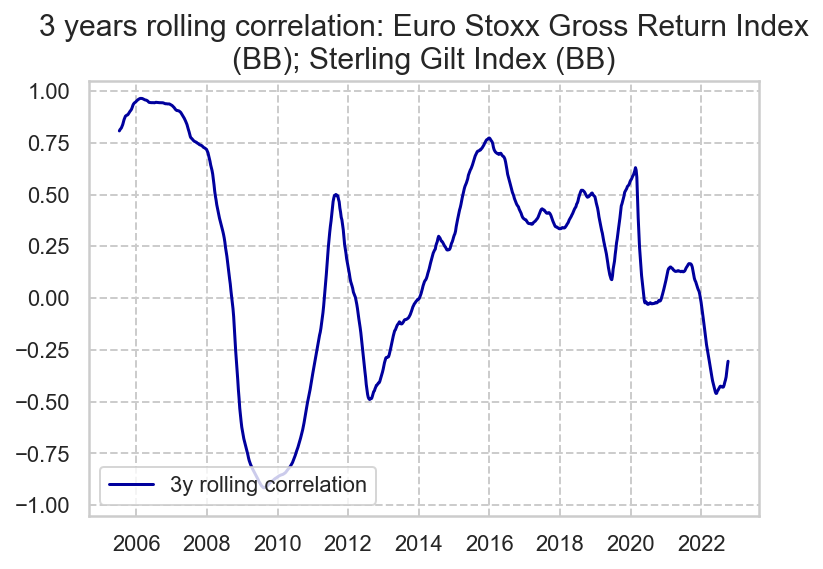

In [6]:
""" German Correlations, rolling """
weeks = 156

fig, axs = plot_utils.corr_plot_seaborn(stoxxgr, ukgov, weeks)
credit_name = utils.retrieve_name(ukgov)
equity_name = utils.retrieve_name(stoxxgr)
save_loc = 'bsc_plots/3y_corr_' + equity_name[0] + '_' + credit_name[0] + '.eps'
# plt.savefig(save_loc, dpi=600)
    

' US Correlations, rolling '

KeyboardInterrupt: 

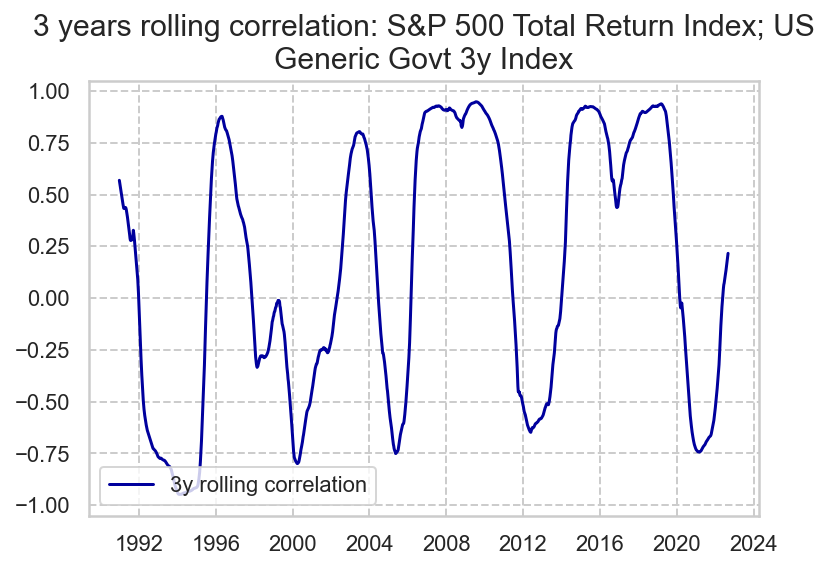

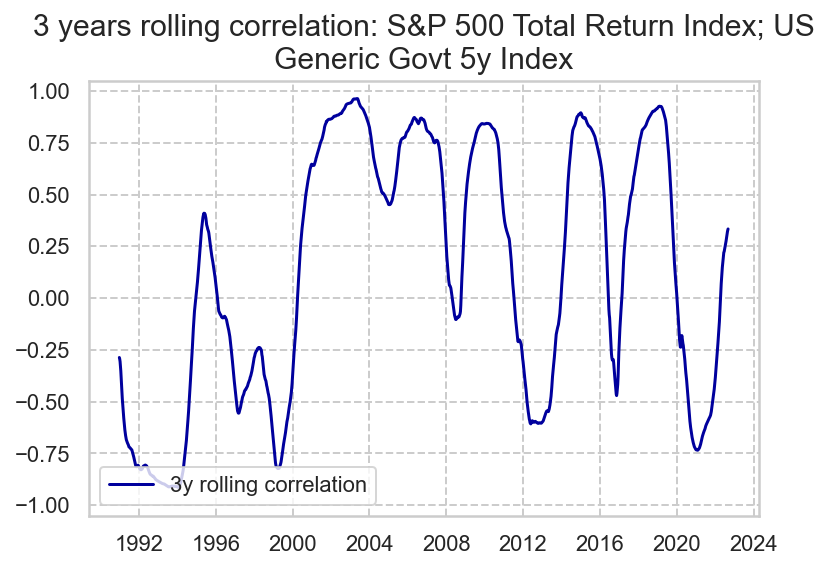

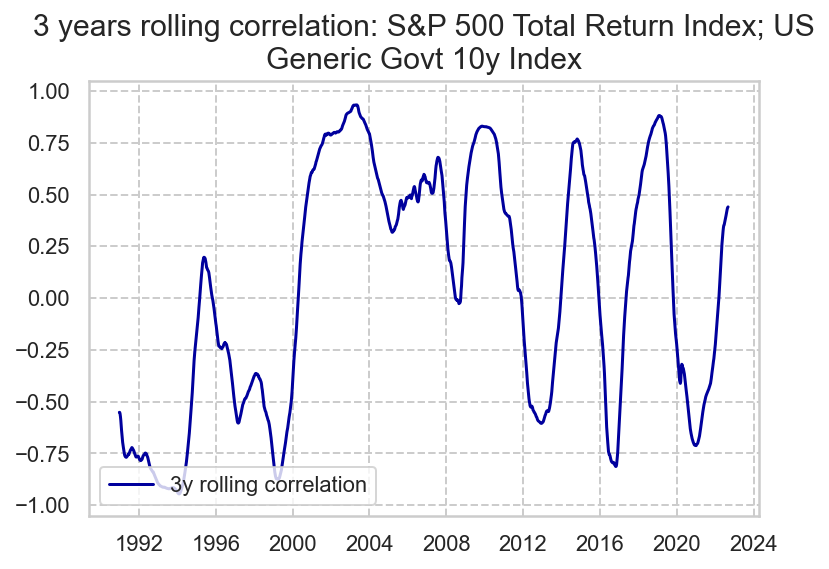

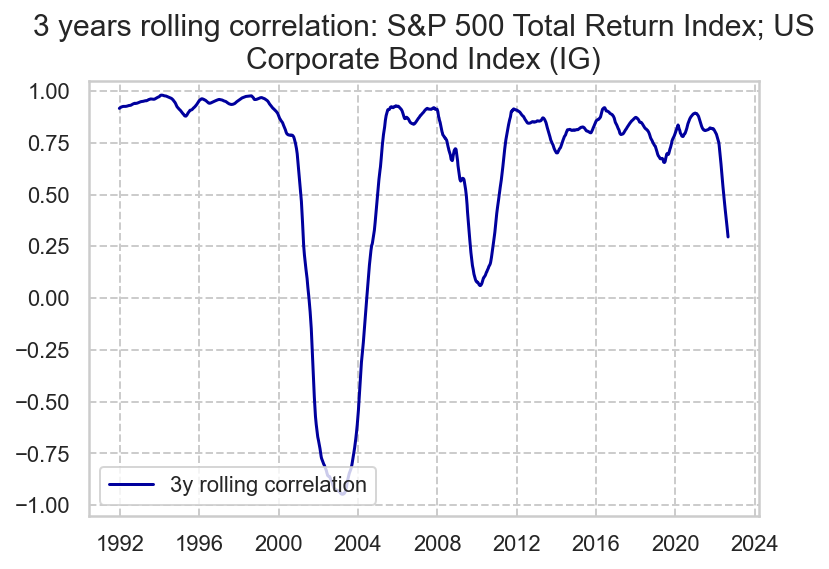

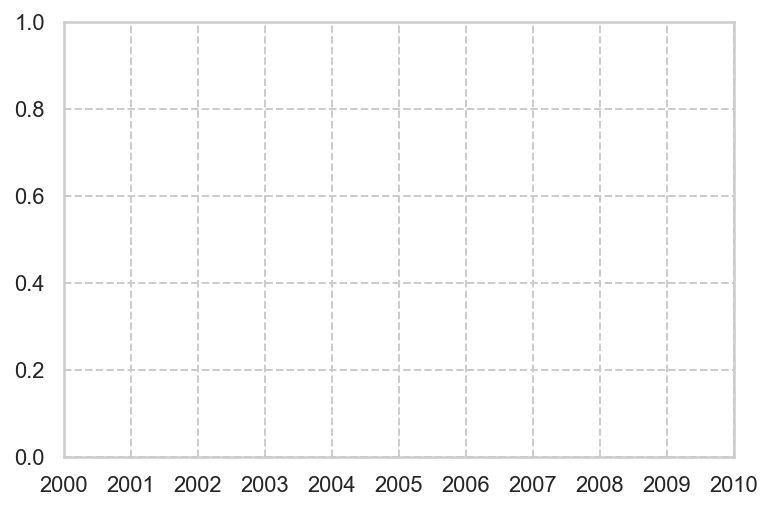

In [7]:
""" US Correlations, rolling """
weeks = 156
for i in range(len(us_assets)-1):
    fig, axs = plot_utils.corr_plot_seaborn(sptr, us_assets[i], weeks)
    credit_name = utils.retrieve_name(us_assets[i])
    equity_name = utils.retrieve_name(sptr)
    save_loc = 'bsc_plots/3y_corr_' + equity_name[0] + '_' + credit_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

' UK Correlations, rolling '

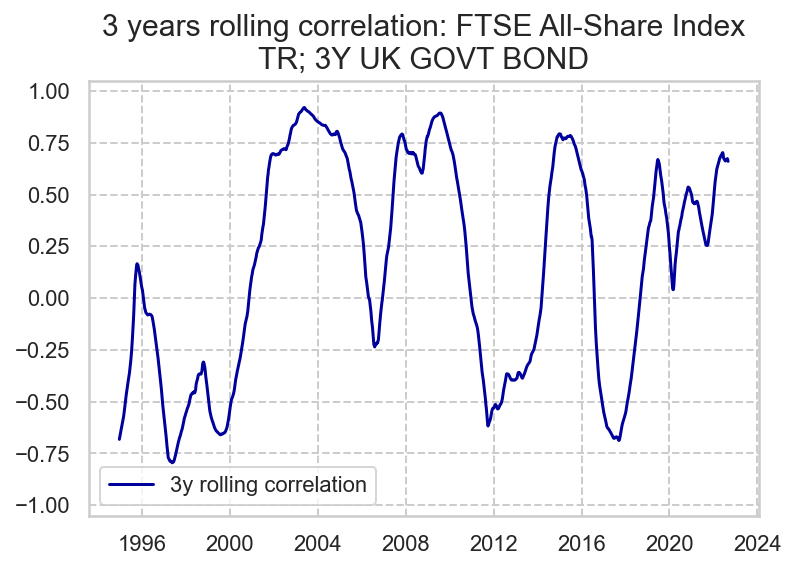

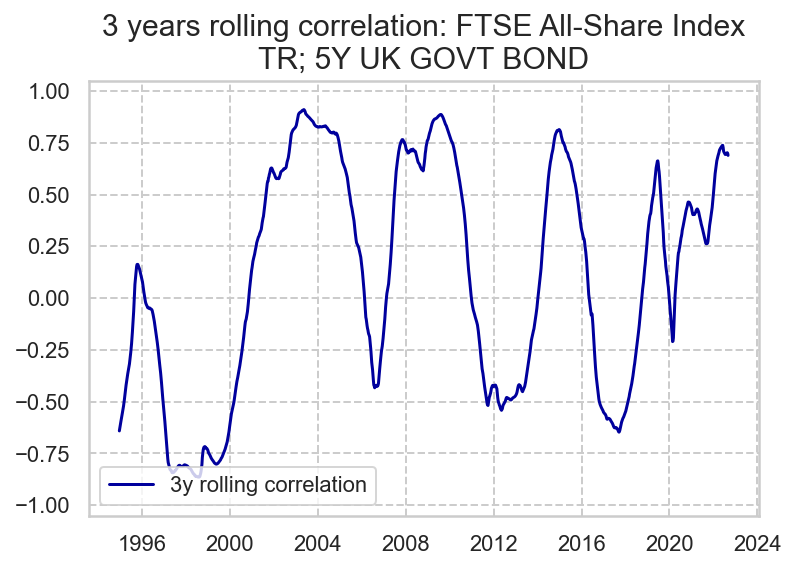

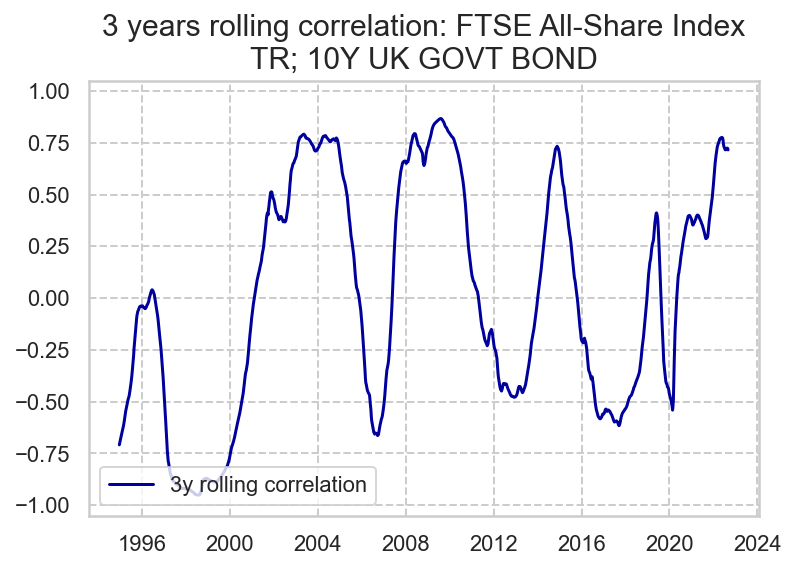

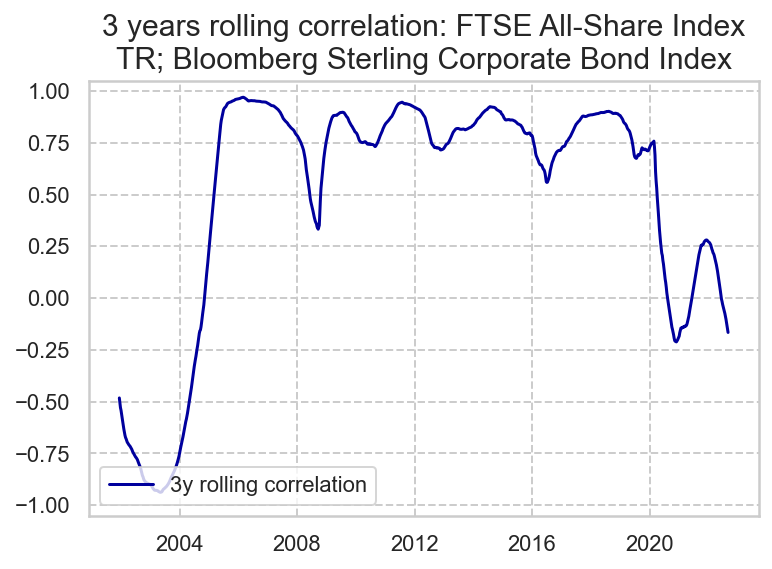

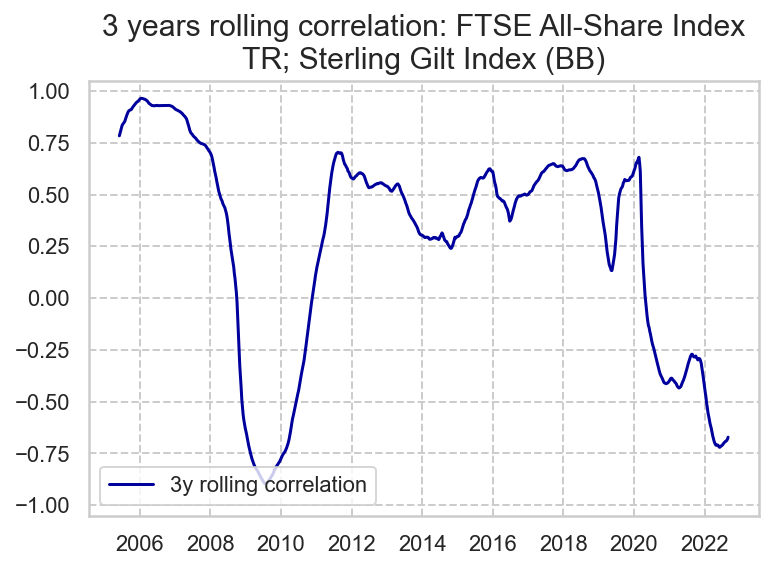

In [ ]:
""" UK Correlations, rolling """
weeks = 156

fig, axs = plot_utils.corr_plot_seaborn(uk_assets[-1], uk_assets[i], weeks)
credit_name = utils.retrieve_name(uk_assets[i])
equity_name = utils.retrieve_name(uk_assets[-1])
save_loc = 'bsc_plots/3y_corr_' + equity_name[0] + '_' + credit_name[0] + '.eps'
# plt.savefig(save_loc, dpi=600)

#### <span style='font-family:Computer Modern'>(2/3): Rolling Returns

' US Returns, rolling '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


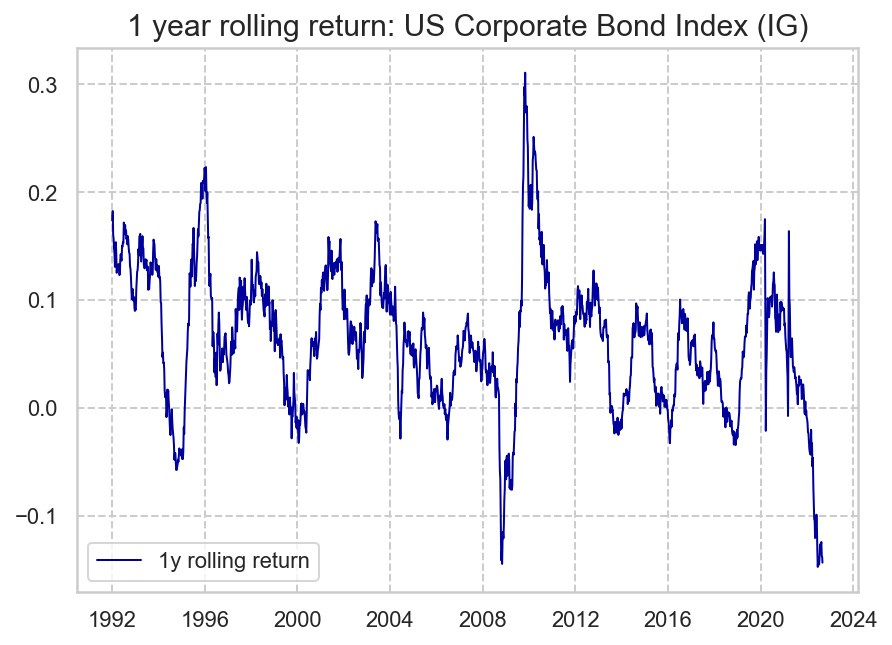

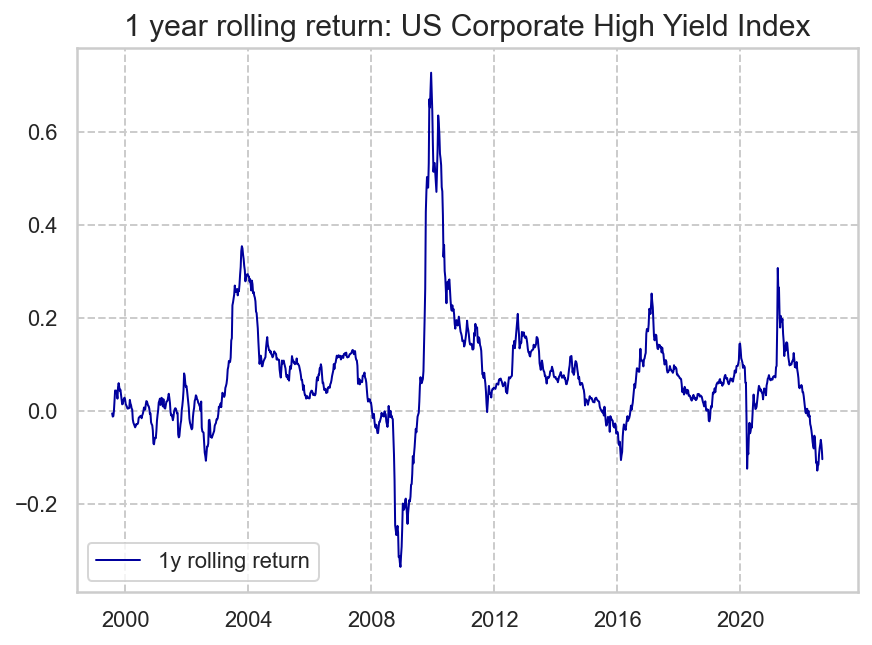

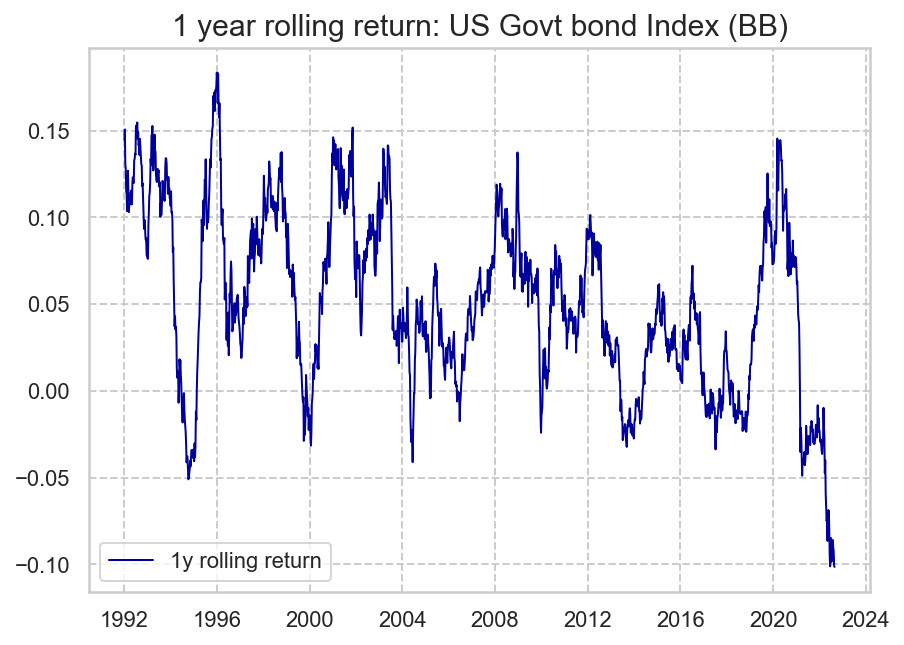

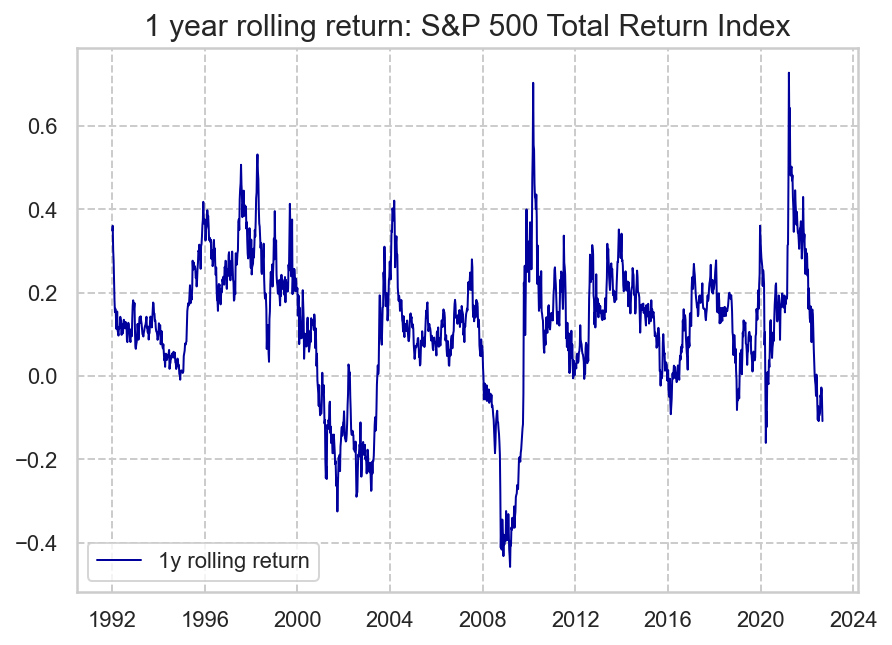

In [ ]:
""" US Returns, rolling """ 
weeks = 52
# returns = returns[returns['date'] > '19910629']
plt.rcParams["axes.titlesize"] = 15
for i in range(3,len(us_assets)):
    fig, axs = plot_utils.return_plot(us_assets[i], weeks)
    asset_name = utils.retrieve_name(us_assets[i])
    save_loc = 'bsc_plots/1y_return_' + asset_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

' UK Returns, rolling '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


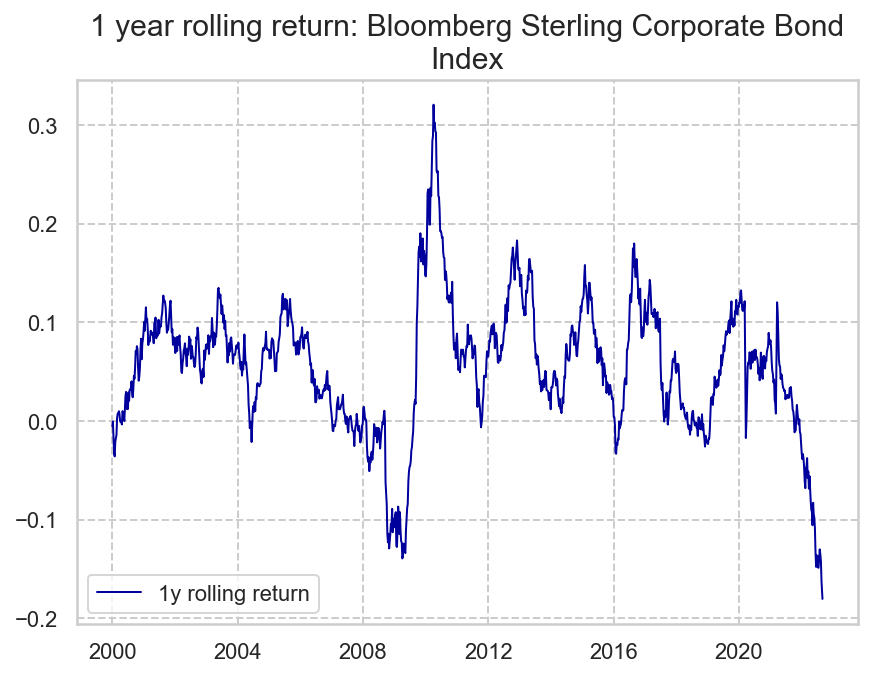

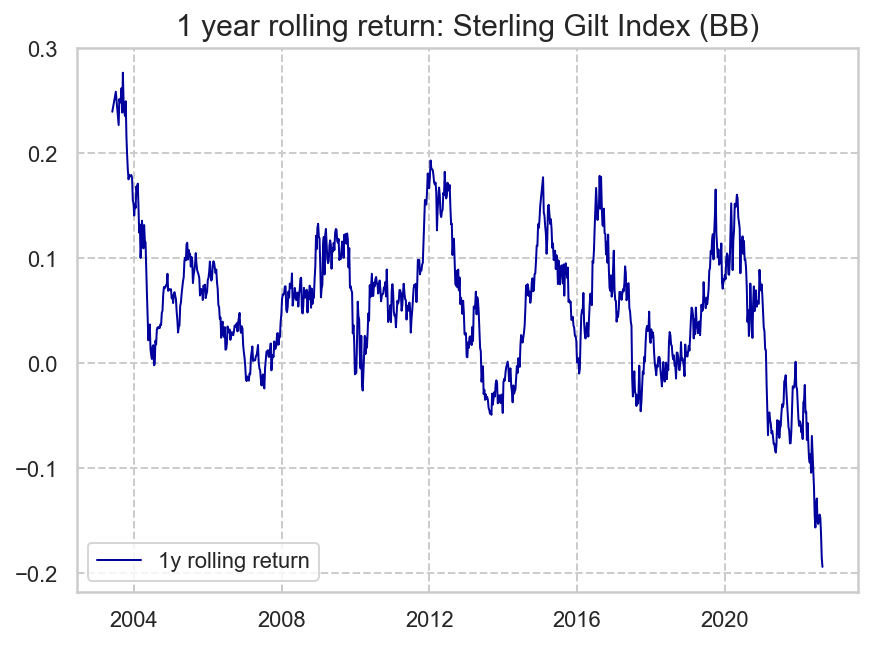

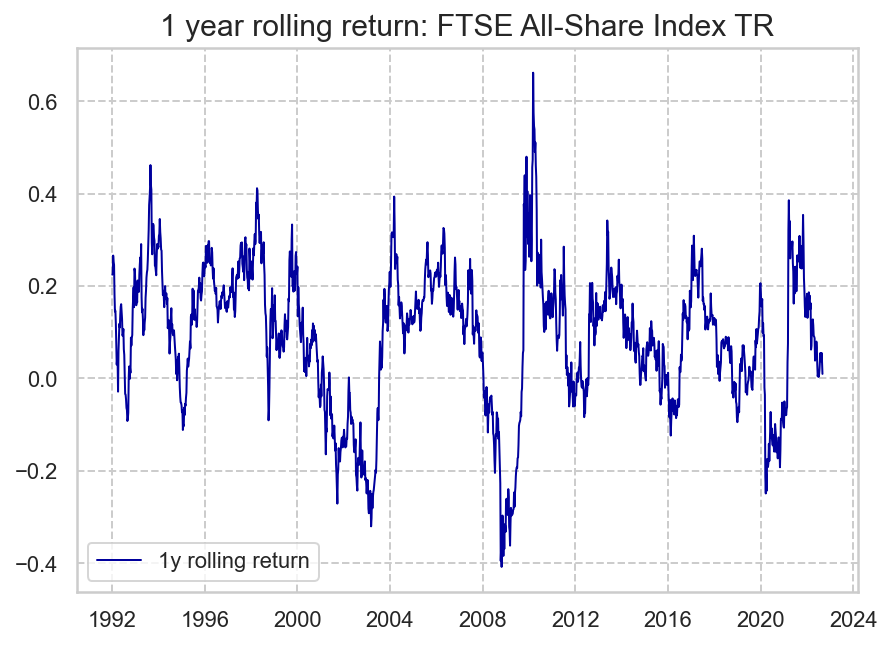

In [ ]:
""" UK Returns, rolling """
weeks = 52
# returns = returns[returns['date'] > '20000101']
plt.rcParams["axes.titlesize"] = 15
for i in range(3,len(uk_assets)):
    fig, axs = plot_utils.return_plot(uk_assets[i], weeks)
    asset_name = utils.retrieve_name(uk_assets[i])
    save_loc = 'bsc_plots/1y_return_' + asset_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

' Returns, rolling '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


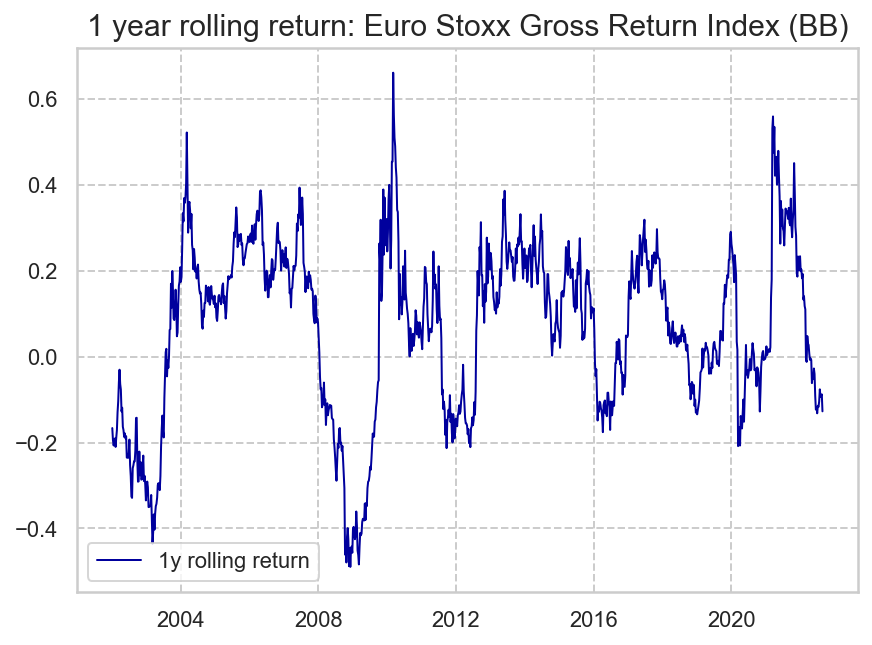

In [ ]:
""" Returns, rolling """
weeks = 52
# returns = returns[returns['date'] > '20020201']
plt.rcParams["axes.titlesize"] = 15

fig, axs = plot_utils.return_plot(stoxxgr, weeks)
asset_name = utils.retrieve_name(stoxxgr)
save_loc = 'bsc_plots/1y_return_' + asset_name[0] + '.eps'
# plt.savefig(save_loc, dpi=600)

#### <span style='font-family:Computer Modern'> (3/3): Rolling Sigma

' US Sigma, rolling '

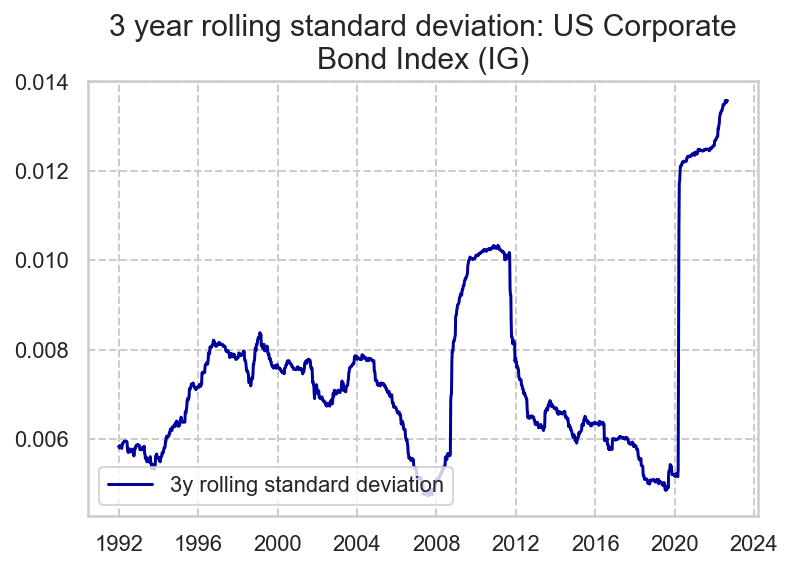

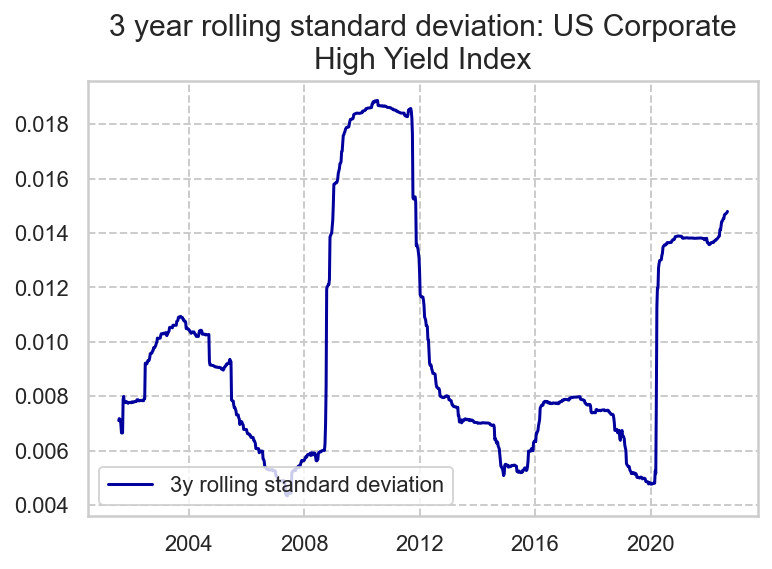

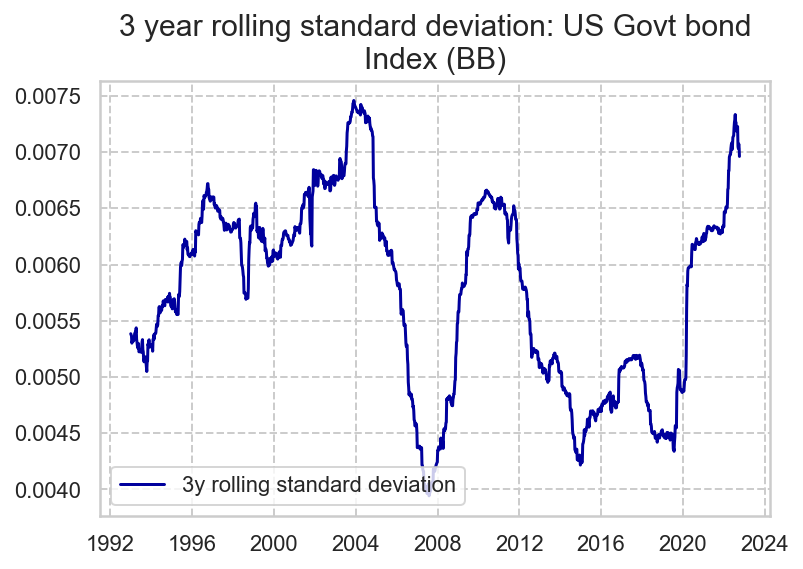

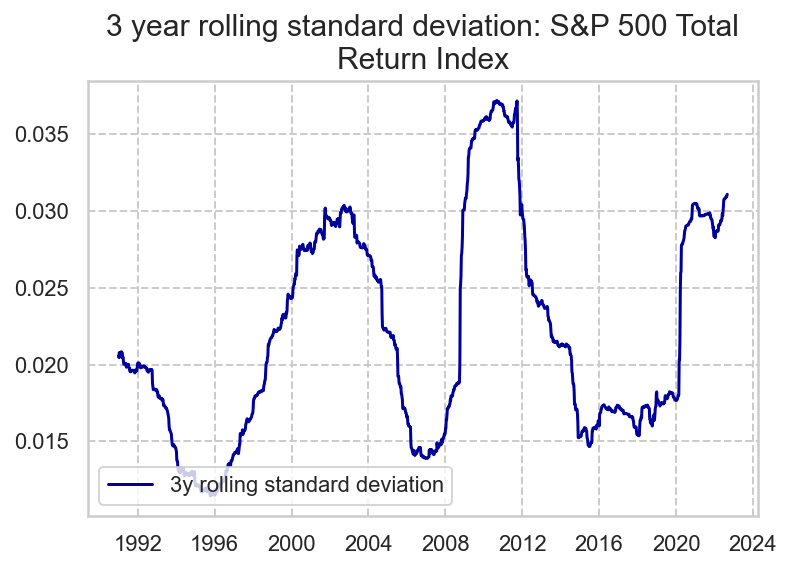

In [ ]:
""" US Sigma, rolling """
weeks = 156
# std_returns_series1 = std_returns_series1[std_returns_series1['date'] > '19920101']
plt.rcParams["axes.titlesize"] = 15
for i in range(3, len(us_assets)):
    fig, axs = plot_utils.sigma_plot(us_assets[i], weeks)
    asset_name = utils.retrieve_name(us_assets[i])
    save_loc = 'bsc_plots/3y_sigma_' + asset_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

' UK Sigma, rolling '

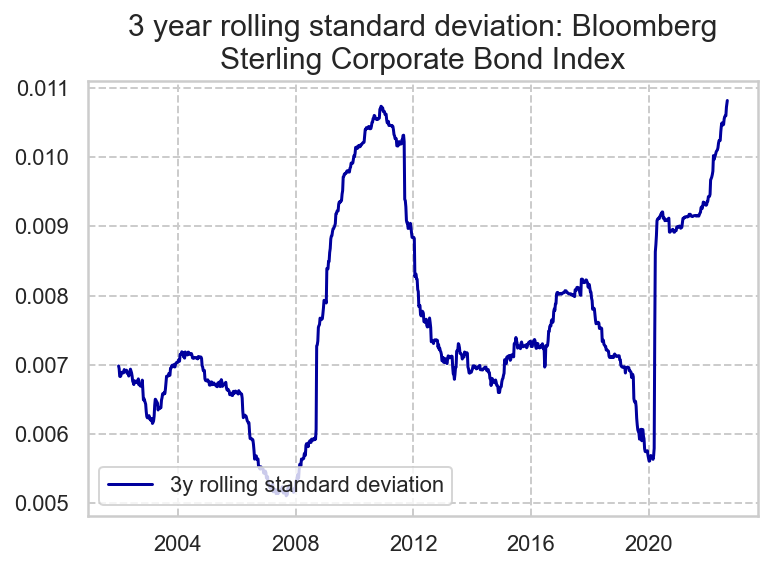

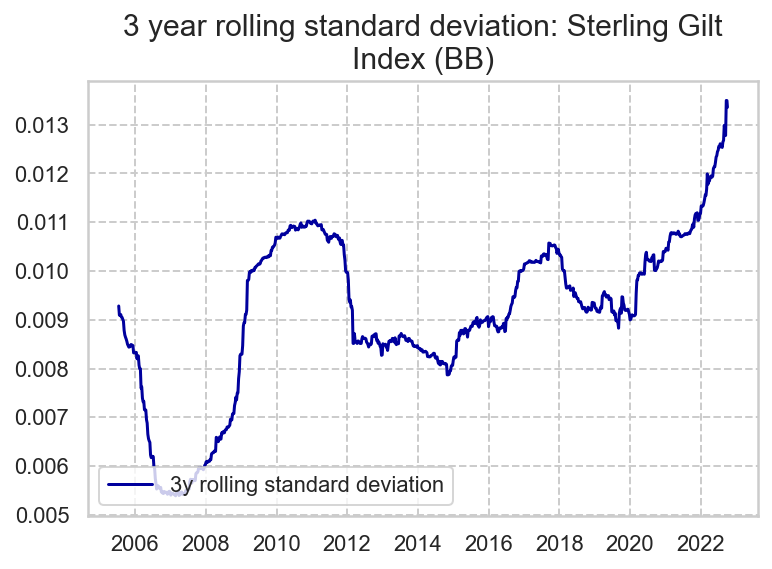

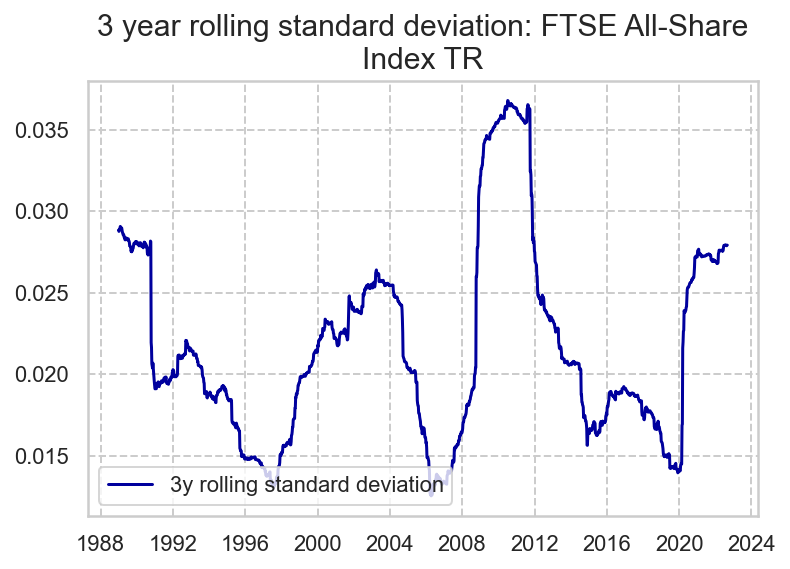

In [ ]:
""" UK Sigma, rolling """
weeks = 156
# std_returns_series1 = std_returns_series1[std_returns_series1['date'] > '19920101']
plt.rcParams["axes.titlesize"] = 15
for i in range(3, len(uk_assets)):
    fig, axs = plot_utils.sigma_plot(uk_assets[i], weeks)
    asset_name = utils.retrieve_name(uk_assets[i])
    save_loc = 'bsc_plots/3y_sigma_' + asset_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

' German Sigma, rolling '

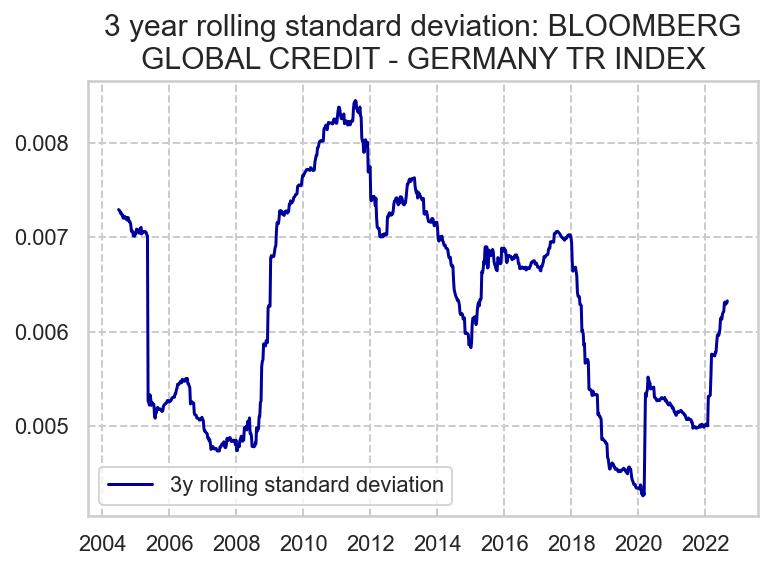

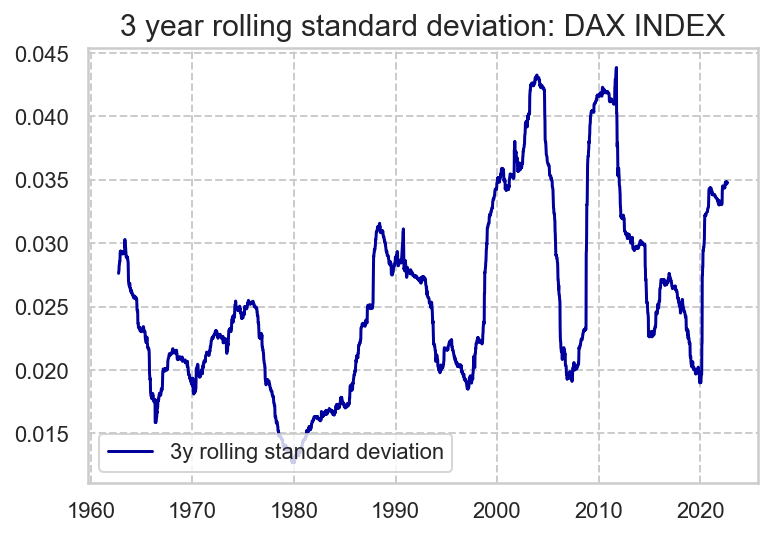

In [ ]:
""" German Sigma, rolling """
weeks = 156
# std_returns_series1 = std_returns_series1[std_returns_series1['date'] > '20050101']
plt.rcParams["axes.titlesize"] = 15
for i in range(3, len(ger_assets)):
    fig, axs = plot_utils.sigma_plot(ger_assets[i], weeks)
    asset_name = utils.retrieve_name(ger_assets[i])
    save_loc = 'bsc_plots/3y_sigma_' + asset_name[0] + '.eps'
    # plt.savefig(save_loc, dpi=600)

#### <span style='font-family:Computer Modern'> Rolling Sigma and Return

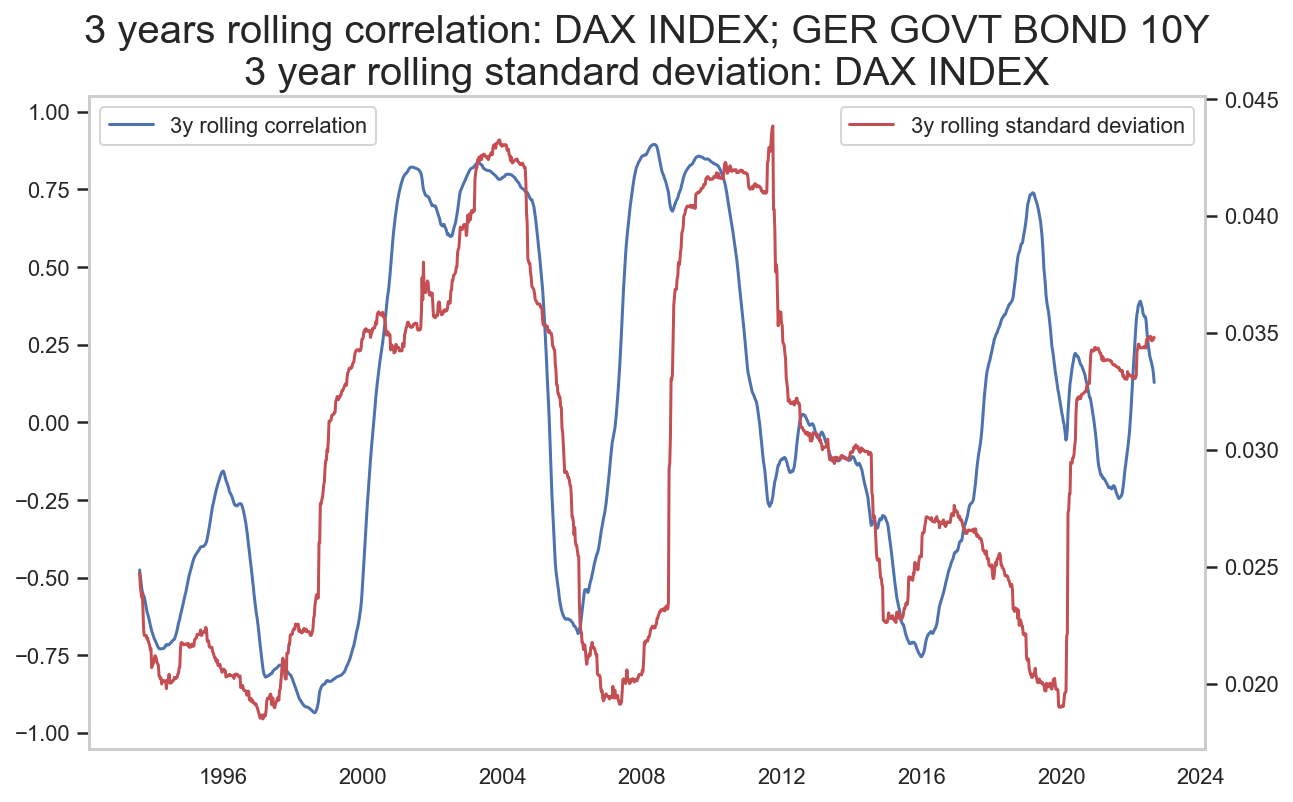

In [ ]:
""" Overlap, sigma & correlation """
weeks = 156
plt.rcParams["figure.figsize"] = (10,6)

# set 1st input series and corr length
series1 = dax
series2 = ger10
corr_length = 156

# set theme and style
sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': ''});

# find which series is the shortest and set start date to that of the shortest series
if len(series1) > len(series2):
    tail_length = len(series2)
    start_date = series2.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')
else:
    tail_length = len(series1)
    start_date = series1.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')

# set tail length as the shortest series
series1 = series1.tail(tail_length)
series2 = series2.tail(tail_length)

series1.reset_index(inplace=True, drop=True)
series2.reset_index(inplace=True, drop=True)

# make it work for both yield and last_price columns
col_name1 = 'last_price'
col_name2 = 'last_price'
col_name = 'last_price'
if 'yield' in series1.columns:
    col_name1 = 'yield'
    col_name = 0
if 'yield' in series2.columns:
    col_name2 = 'yield'
    col_name = 0

# calc the rollling corr
corr = series1[col_name1].rolling(corr_length).corr(series2[col_name2])

# insert into dataframe, add dates and rename calucalted correlation column to corr
corr = pd.DataFrame(corr)
corr['date'] = series1['date']
corr['corr'] = corr[col_name]
corr = corr.drop(col_name, axis=1)

# cutoff to startdate
corr = corr[corr['date'] > start_date]

# auto-create 1st title
title1 = str(corr_length/52)[0:1] + ' years rolling correlation:' + \
    ' ' + series1.iloc[1, 0] + '; ' + series2.iloc[1, 0]

# create canvas
fig, axs = plt.subplots(1, 1)

# plot it
sns.lineplot(corr, y='corr', x='date', linewidth=1.5, legend=False, ax=axs)

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper left', labels=['3y rolling correlation'])
plt.ylabel("");
plt.xlabel("");
plt.ylim(-1.05, 1.05)

# add second y-axis
ax2 = plt.twinx()



# ----------------------
# set 2nd series
series1 = dax

# calculate return
returns_series1 = series1['last_price'].pct_change(periods=1)

# insert into dataframe
returns_series1 = pd.DataFrame(returns_series1)

# calculate rolling returns
std_returns_series1 = returns_series1.rolling(weeks).std()

# add dates and rename column to std
std_returns_series1['date'] = series1['date']
std_returns_series1 = std_returns_series1.rename(columns={'last_price': 'std'})

# cutoff to match shortest of the 1st input
std_returns_series1 = std_returns_series1[std_returns_series1['date'] > start_date]

# plot it on second axis
sns.lineplot(std_returns_series1, x='date', y='std',
             color='r', legend=False, linewidth=1.5, ax=ax2)

# auto-create 2nd title
title2 = str(corr_length/52)[0:1] + ' year rolling standard deviation: ' + str(series1.iloc[0]['name'])

# concatinate titles and attah it to axis
title_final = title1 + '\n' + title2
plt.rcParams["axes.titlesize"] = 20
axs.set_title(title_final);

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper right', labels=['3y rolling standard deviation'])
plt.ylabel("");
plt.xlabel("");

# plt.savefig('bsc_plots/3y_corr_dax_usgov_sigma_sptr.eps', dpi=600)

## <span style='font-family:Computer Modern'> 4. Histograms with Kernel Denisty Estimates

' German price returns histogram '

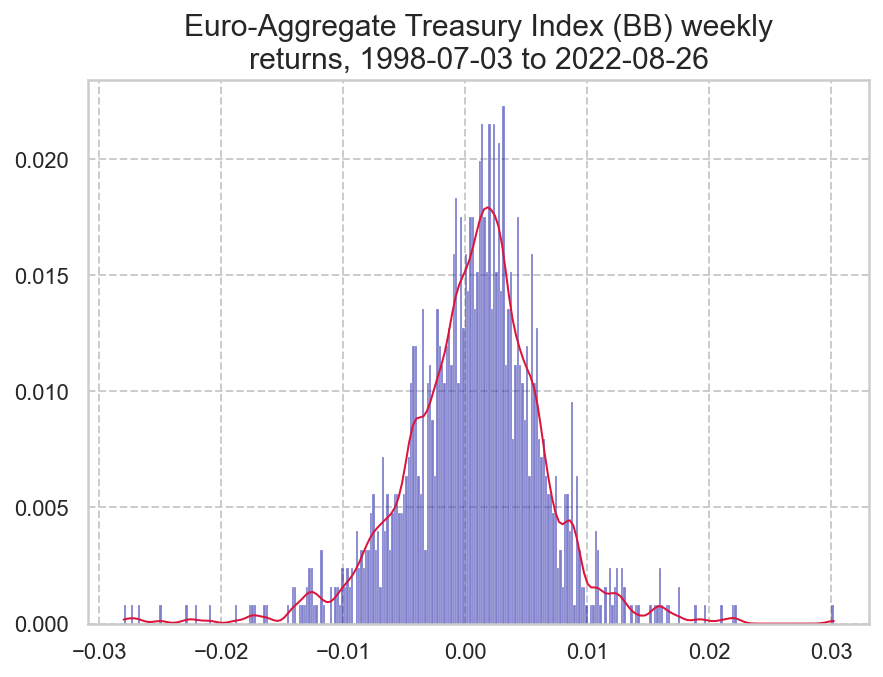

In [ ]:
""" German price returns histogram """
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["figure.figsize"] = (7,5)
temp1 = eugov
fig, axs = plot_utils.histogram_plot(temp1)
axs.lines[0].set_color('crimson')
asset_name = utils.retrieve_name(temp1)
save_loc = 'bsc_plots/hist_kde_' + asset_name[0] + '_returns_01_22.eps'
# plt.savefig(save_loc, dpi=600)

' UK price returns histogram '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


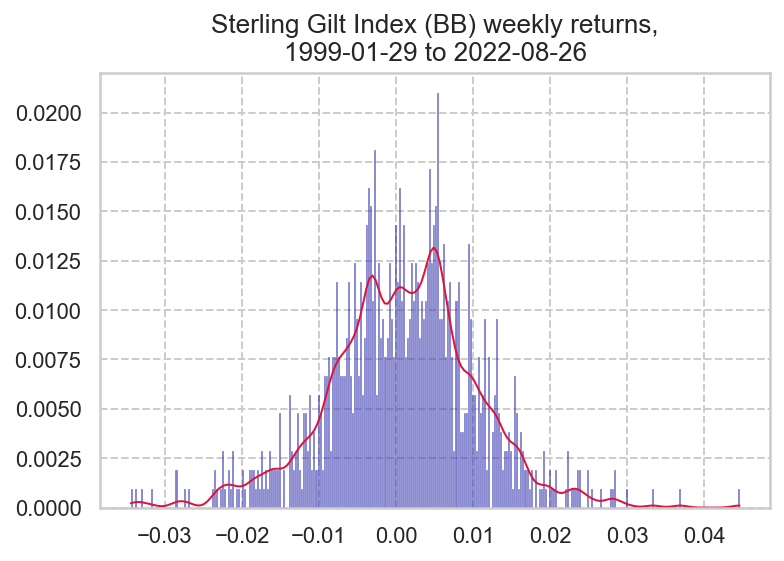

In [ ]:
""" UK price returns histogram """
plt.rcParams["axes.titlesize"] = 13


fig, axs = plot_utils.histogram_plot(ukgov)
axs.lines[0].set_color('crimson')
asset_name = utils.retrieve_name(ukgov)
save_loc = 'bsc_plots/hist_kde_' + asset_name[0] + '_returns_99_22.eps'
# plt.savefig(save_loc, dpi=600)


' US price returns histogram '

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


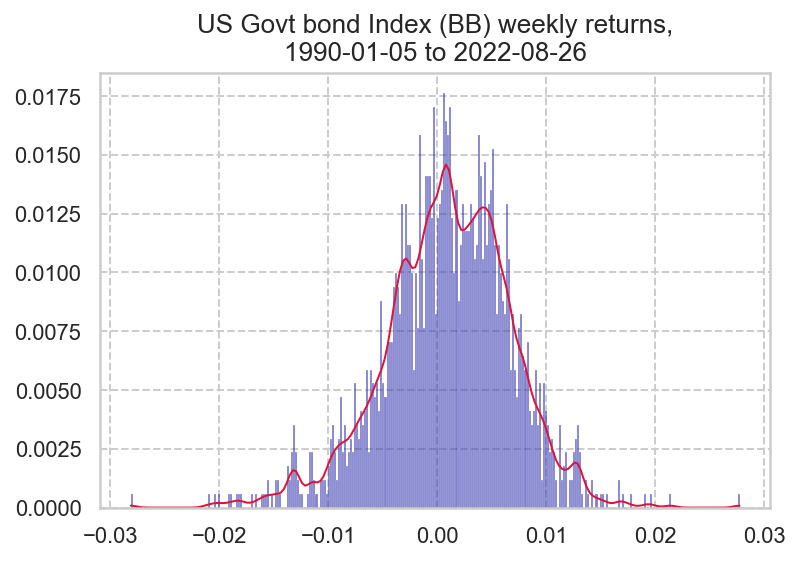

In [ ]:
""" US price returns histogram """
plt.rcParams["axes.titlesize"] = 13

for i in range(3, 4):
    fig, axs = plot_utils.histogram_plot(usgov)
    axs.lines[0].set_color('crimson')
    asset_name = utils.retrieve_name(usgov)
    save_loc = 'bsc_plots/hist_kde_' + asset_name[0] + '_returns_90_22.eps'
    # plt.savefig(save_loc, dpi=600)

## <span style='font-family:Computer Modern'> 5. Value at Risk and Expected Shortfall

#### <span style='font-family:Computer Modern'> (1/2): VaR and ES derived from the Kernel Density Estimate

' Find VaR and ES of KDE '

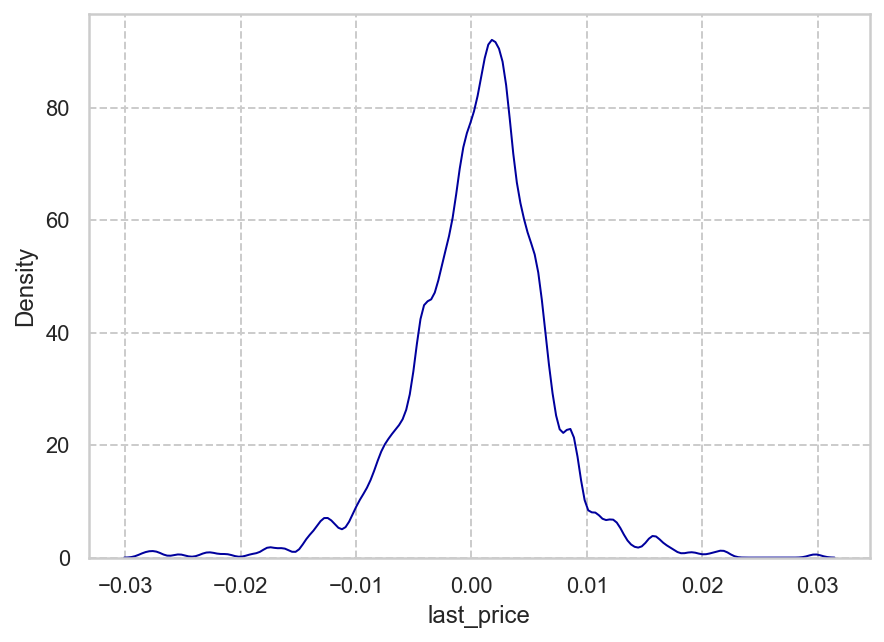

In [ ]:
""" Find VaR and ES of KDE """
# Series to evaluate
series1 = eugov
# series1 = series1[series1['date'] > '2007-01-01']
# series1 = series1[series1['date'] < '2022-01-01']

# calculate weekly returns using np.log
lp = series1['last_price']
weekly_returns = np.log(lp / lp.shift(1))[1:]

# plot the masterpiece
my_kde = sns.kdeplot(
    data=weekly_returns, linewidth=1, 
    bw_adjust=0.4, 
    common_norm=True
)


procentage of total area:  0.999 %
VaR KDE: -1.61 %
ES KDE: -2.31 %
cutoff: 47 of 200


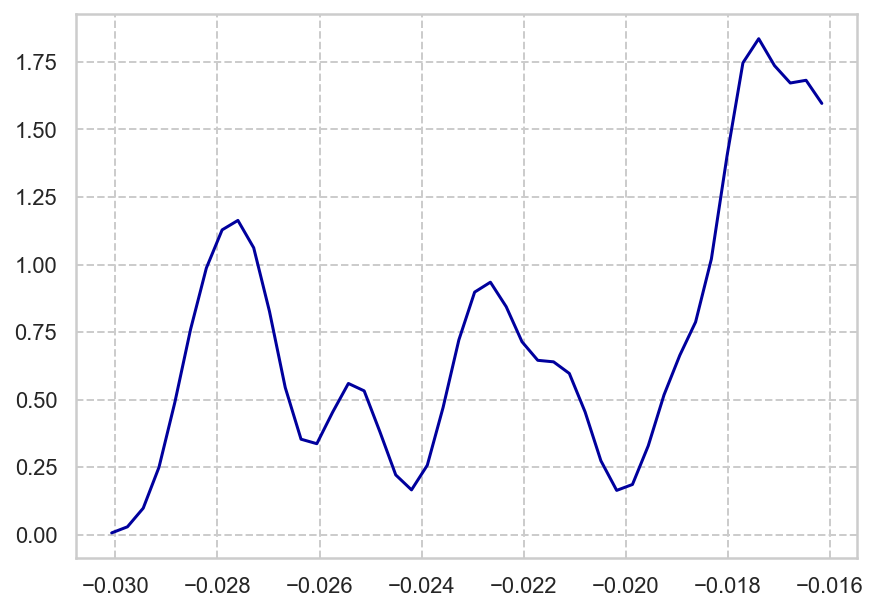

In [ ]:

# extract kde line from plot
line = my_kde.lines[0]
x, y = line.get_data()
dfx = pd.DataFrame(x)
dfy = pd.DataFrame(y)

# make sure area ~ 1 (pdf criteria)
area = np.trapz(y,x)

# chop series to find area matching wanted percentile
area = 0
cutoff = 0
tail_area = 0.01
while area < tail_area:
    cutoff = cutoff + 1
    ycut = y[0:cutoff]
    xcut = x[0:cutoff]
    area = np.trapz(ycut,xcut)
# correct for 1 overstep
ycut = y[0:cutoff-1]
xcut = x[0:cutoff-1]

plt.plot(xcut,ycut)

# what percentile did we get...?
area = np.trapz(ycut,xcut)
print("procentage of total area: ", str(area*100)[0:5], "%")
VaR_kde = xcut[-1]*100
print('VaR KDE: ' + str(VaR_kde)[0:5] + ' %')
ES_kde = np.average([l for l in xcut if l >= VaR_kde])*100
print('ES KDE: ' + str(ES_kde)[0:5] + ' %')
print('cutoff: ' + str(cutoff) + ' of ' + str(len(x)));


#### <span style='font-family:Computer Modern'> (2/2): VaR and ES - Historical and derived from EVT methods

/var/folders/vn/dlt8xpl50tb76_5r7m5gg4vc0000gn/T/ipykernel_32317/710159615.py:24: RuntimeWarning: invalid value encountered in log
  return n_observations * np.log(params[1]) + (1 + 1 / params[0]) * log_likelihood
/var/folders/vn/dlt8xpl50tb76_5r7m5gg4vc0000gn/T/ipykernel_32317/710159615.py:22: RuntimeWarning: invalid value encountered in log
  log_likelihood = log_likelihood + np.log(1 + params[0] / params[1] * obs)


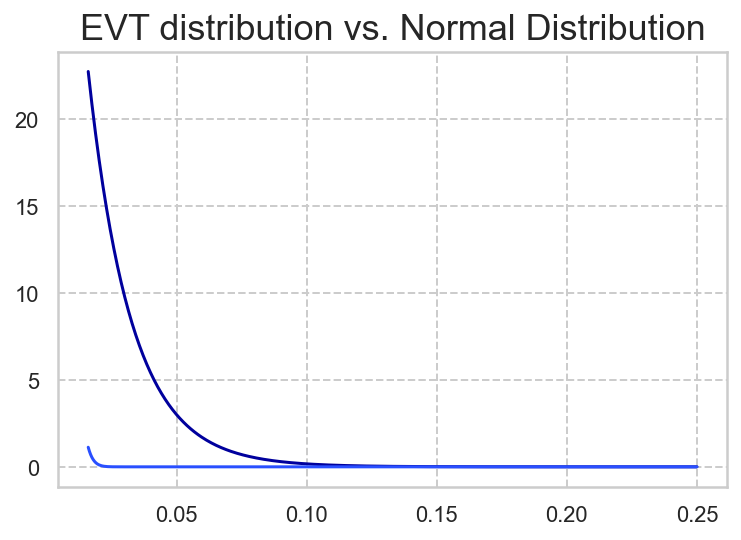

Vanilla Value at Riks @ 0.99: 1.6%
Vanilla Expected Shortfall @ 0.99: 2.2%

EVT Value at risk @ 0.99: 1.6%
EVT Expected shortfall @ 0.99: 2.9%


In [ ]:
# set losses as the minus returns
losses = -weekly_returns

# specify percentile
c = 1 - tail_area

# calc VaR = u
u = np.quantile(losses, c)

# excess losses
excess_losses = [l-u for l in losses if l >= u]


from scipy.optimize import minimize
EPSILON = 1e-16

def evt_ml_objective_function(params, data) -> float:
    n_observations = len(data)
    log_likelihood = 0

    for obs in data:
        log_likelihood = log_likelihood + np.log(1 + params[0] / params[1] * obs)

    return n_observations * np.log(params[1]) + (1 + 1 / params[0]) * log_likelihood
    
def evt_parameter_generator(excess_losses) -> list:
    cons = []
    for obs in excess_losses:
        cons.append({'type': 'ineq', 'fun': lambda x: 1 + x[0] / x[1] * obs})

    x0 = [0.1, 0.001]
    sol = minimize(evt_ml_objective_function, x0, constraints=cons, args=excess_losses)
    return sol.x

sol = evt_parameter_generator(excess_losses=excess_losses)

def generalized_pareto_distribution_pdf(x: float, xi: float, beta: float) -> float:
        if xi == 0:
                raise NotImplementedError
        else:
                return 1 / beta * (1 + xi * x /beta) ** (-1/xi - 1)


import scipy

x = np.linspace(u, 0.25, 500)
gpd_values = generalized_pareto_distribution_pdf(x, x[0], x[1])
norm_values = scipy.stats.norm.pdf(x, np.mean(losses), np.std(losses))

fig, ax = plt.subplots()

ax.plot(x, gpd_values, label="Generalized Pareto")
ax.plot(x, norm_values, label="Normal Distribution")
ax.set_title("EVT distribution vs. Normal Distribution", fontsize=18);

fig.set_size_inches(6,4)
plt.show()

xi = sol[1]
beta = sol[1]
N = len(losses)
n = len(excess_losses)

VaR = u  + beta/xi * ( (N/n * (1 - c)) ** (-xi) - 1)
ES = VaR / (1 - xi) + (beta - u * xi)/(1-xi)

VaR_vanilla = np.quantile(losses, c)
ES_vanilla  = np.average([l for l in losses if l >= VaR_vanilla])

print(f"Vanilla Value at Riks @ {c}: " + str(np.round(VaR_vanilla*100, 1)) + "%");
print(f"Vanilla Expected Shortfall @ {c}: " + str(np.round(ES_vanilla*100, 1)) + "%");
print()
print(f"EVT Value at risk @ {c}: " + str(np.round(VaR*100, 1)) + "%");
print(f"EVT Expected shortfall @ {c}: " + str(np.round(ES*100, 1)) + "%");

